In [1]:
import sys
import os

import sys
sys.path.insert(0, os.path.abspath('../src/'))
sys.path.insert(1, os.path.abspath('../src/rl/'))
sys.path.insert(2, os.path.abspath('../src/rl/agents/'))
sys.path.insert(4, os.path.abspath('../src/rl/agents/base/'))
sys.path.insert(5, os.path.abspath('../src/rl/environments/'))
sys.path.insert(6, os.path.abspath('../src/rl/environments/base'))
sys.path.insert(7, os.path.abspath('../src/rl/harnesses/'))
sys.path.insert(8, os.path.abspath('../src/rl/agents/tabular/'))

In [2]:
from agents.RandomTrader import RandomTrader
from environments.GenerativeMarketEnv import GenerativeMarketEnv
from harnesses.SimHarness import SimHarness
import seaborn as sns

In [3]:
sns.set_theme()
sns.set_palette("pastel")
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [4]:
# create a random trader that can decide to invest on two stocks
trader = RandomTrader(2)

In [5]:
# create a generitive market that produces returns on two assets
μ = [4, 6]
Σ = [[1, 0], [0, 1]]
market = GenerativeMarketEnv(μ, Σ)

In [6]:
# create a harness to run the simulation
harness = SimHarness(market, trader)

In [7]:
harness.train(250)

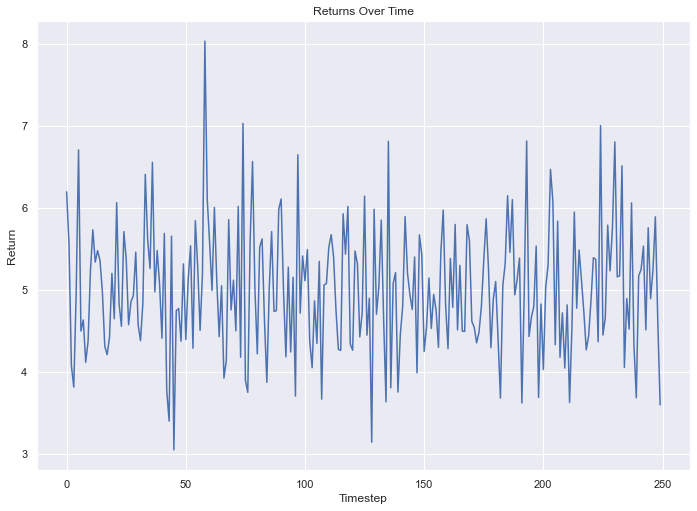

In [8]:
harness.plot_training_results()

In [6]:
w1 = [0, 0.2, 0.4, 0.6, 0.8, 1]
w2 = [0, 0.2, 0.4, 0.6, 0.8, 1]
args = [w1, w2]

In [7]:
import itertools

In [8]:
import numpy as np

In [9]:
ws = [[a, b] for a in w1 for b in w2 if a + b == 1]

In [10]:
len(ws)

6

In [11]:
np.linspace(0, 1, 2)

array([0., 1.])

In [12]:
def calculate_valid_weights(num_assets, num_increments):
    ws = []
    for n in range(num_assets):
        ws.append(np.linspace(0, 1, num_increments))
    ws = list(itertools.product(*ws))
    return list(filter(lambda a: sum(a) == 1, ws))

In [13]:
ws = calculate_valid_weights(3, 5)

In [18]:
ws

[(0.0, 0.0, 1.0),
 (0.0, 0.25, 0.75),
 (0.0, 0.5, 0.5),
 (0.0, 0.75, 0.25),
 (0.0, 1.0, 0.0),
 (0.25, 0.0, 0.75),
 (0.25, 0.25, 0.5),
 (0.25, 0.5, 0.25),
 (0.25, 0.75, 0.0),
 (0.5, 0.0, 0.5),
 (0.5, 0.25, 0.25),
 (0.5, 0.5, 0.0),
 (0.75, 0.0, 0.25),
 (0.75, 0.25, 0.0),
 (1.0, 0.0, 0.0)]

In [97]:
possibilities = [] 
for incr in range(2, 60):
    ws = calculate_valid_weights(3, incr)
    tot = len(ws)
    possibilities.append(tot)

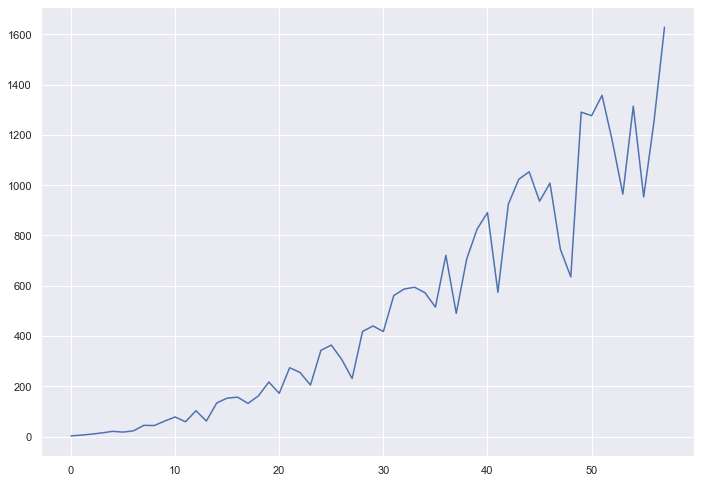

In [98]:
import matplotlib.pyplot as plt

plt.plot(np.arange(58), possibilities)

In [103]:
possibilities = [] 
for stocks in range(2, 12):
    ws = calculate_valid_weights(stocks, 5)
    tot = len(ws)
    possibilities.append(tot)

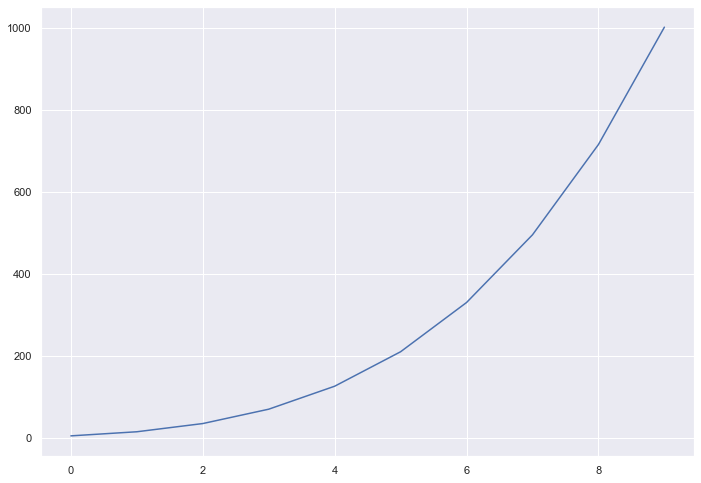

In [105]:
import matplotlib.pyplot as plt

plt.plot(np.arange(10), possibilities)